In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\rutik\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load the dataset
file_path = "Wellbeing_and_lifestyle_data_Kaggle.xlsx"
data = pd.read_excel(file_path)

In [3]:
data

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,0,4,0,10,0,4,2,8,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3,3,6,8,7,4,6,3,1,7,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,4,3,0,10,10,8,6,5,1,7,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,1,1,10,8,2,7,3,2,1,6,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


###  Data preprocessing

In [4]:
# Encode categorical variables
age_dummies = pd.get_dummies(data["AGE"], prefix="AGE")
data = pd.concat([data.drop("AGE", axis=1), age_dummies], axis=1)

In [5]:
data

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,3,2,2,5,0,5,2,0,1,6,...,1,4,0,5,Female,609.5,0,1,0,0
1,2,3,4,3,8,10,5,2,2,5,...,2,3,2,6,Female,655.6,0,1,0,0
2,2,3,3,4,4,10,3,2,2,2,...,2,4,8,3,Female,631.6,0,1,0,0
3,3,3,10,3,10,7,2,5,2,3,...,1,5,2,0,Female,622.7,0,0,1,0
4,5,1,3,3,10,4,2,4,2,5,...,2,8,1,5,Female,663.9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,0,4,0,10,0,4,2,8,...,1,5,2,5,Female,644.5,0,0,1,0
15968,3,3,6,8,7,4,6,3,1,7,...,2,10,5,8,Female,714.9,1,0,0,0
15969,4,3,0,10,10,8,6,5,1,7,...,2,10,1,10,Male,716.6,1,0,0,0
15970,1,1,10,8,2,7,3,2,1,6,...,2,1,6,8,Female,682.0,1,0,0,0


In [15]:
print("Unique gender values:", data["GENDER"].unique())

Unique gender values: ['Female' 'Male']


In [6]:
# Label encoding for GENDER
data["GENDER"] = data["GENDER"].map({"Male": 0, "Female": 1})

In [7]:
data

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,3,2,2,5,0,5,2,0,1,6,...,1,4,0,5,1,609.5,0,1,0,0
1,2,3,4,3,8,10,5,2,2,5,...,2,3,2,6,1,655.6,0,1,0,0
2,2,3,3,4,4,10,3,2,2,2,...,2,4,8,3,1,631.6,0,1,0,0
3,3,3,10,3,10,7,2,5,2,3,...,1,5,2,0,1,622.7,0,0,1,0
4,5,1,3,3,10,4,2,4,2,5,...,2,8,1,5,1,663.9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,0,4,0,10,0,4,2,8,...,1,5,2,5,1,644.5,0,0,1,0
15968,3,3,6,8,7,4,6,3,1,7,...,2,10,5,8,1,714.9,1,0,0,0
15969,4,3,0,10,10,8,6,5,1,7,...,2,10,1,10,0,716.6,1,0,0,0
15970,1,1,10,8,2,7,3,2,1,6,...,2,1,6,8,1,682.0,1,0,0,0


In [20]:
print(data.dtypes)

FRUITS_VEGGIES               int64
DAILY_STRESS                object
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
GENDER                       int64
WORK_LIFE_BALANCE_SCORE    float64
AGE_21 to 35                 uint8
AGE_36 to 50                 uint8
AGE_51 or more               uint8
AGE_Less than 20             uint8
dtype: object


In [8]:
# Convert DAILY_STRESS column to numeric data type
data['DAILY_STRESS'] = pd.to_numeric(data['DAILY_STRESS'], errors='coerce')

In [9]:
print(data.dtypes)

FRUITS_VEGGIES               int64
DAILY_STRESS               float64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
GENDER                       int64
WORK_LIFE_BALANCE_SCORE    float64
AGE_21 to 35                 uint8
AGE_36 to 50                 uint8
AGE_51 or more               uint8
AGE_Less than 20             uint8
dtype: object


In [30]:
#Convert DAILY_STRESS column to numeric data type gave rise to null values
nan_columns = data.isna().any()

# Print the result
print("Columns with NaN values:")
print(nan_columns[nan_columns == True])

Columns with NaN values:
DAILY_STRESS    True
dtype: bool


In [10]:
#Fill missing values with mean, median, or mode:
data.fillna(data.mean(), inplace=True)

In [11]:
nan_columns = data.isna().any()

# Print the result
print("Columns with NaN values:")
print(nan_columns[nan_columns == True])

Columns with NaN values:
Series([], dtype: bool)


In [13]:
data.to_csv('preprocessed_data.csv', index=False)

In [2]:
data = pd.read_csv('preprocessed_data.csv')

### Standardize numerical variables

In [3]:
numerical_columns = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
                    'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
                    'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'GENDER', 'WORK_LIFE_BALANCE_SCORE',
                    'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [4]:
data

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,0.053598,-0.578838,-0.976195,-0.178885,-1.732447,-0.477639,-0.726028,-1.466526,-0.834747,0.096801,...,-1.639980,-0.553986,-1.218878,-0.408870,0.787532,-1.271734,-0.786906,1.559214,-0.519069,-0.358502
1,-0.639571,0.152309,-0.372295,-0.883050,0.735227,1.142280,0.362605,-0.386337,1.197968,-0.284294,...,0.609763,-0.877659,-0.486065,-0.077357,0.787532,-0.247710,-0.786906,1.559214,-0.519069,-0.358502
2,-0.639571,0.152309,-0.674245,-0.530967,-0.498610,1.142280,-0.363150,-0.386337,1.197968,-1.427581,...,0.609763,-0.553986,1.712376,-1.071895,0.787532,-0.780824,-0.786906,1.559214,-0.519069,-0.358502
3,0.053598,0.152309,1.439404,-0.883050,1.352145,0.170329,-0.726028,1.233946,1.197968,-1.046485,...,-1.639980,-0.230312,-0.486065,-2.066433,0.787532,-0.978521,-0.786906,-0.641349,1.926527,-0.358502
4,1.439936,-1.309984,-0.674245,-0.883050,1.352145,-0.801622,-0.726028,0.693851,1.197968,-0.284294,...,0.609763,0.740708,-0.852472,-0.408870,0.787532,-0.063341,-0.786906,-0.641349,1.926527,-0.358502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,0.053598,0.152309,-1.580094,-0.530967,-1.732447,1.142280,-1.451783,0.693851,1.197968,0.858992,...,-1.639980,-0.230312,-0.486065,-0.408870,0.787532,-0.494275,-0.786906,-0.641349,1.926527,-0.358502
15968,0.053598,0.152309,0.231605,0.877362,0.426768,-0.801622,0.725482,0.153757,-0.834747,0.477896,...,0.609763,1.388055,0.613156,0.585668,0.787532,1.069528,1.270799,-0.641349,-0.519069,-0.358502
15969,0.746767,0.152309,-1.580094,1.581527,1.352145,0.494312,0.725482,1.233946,-0.834747,0.477896,...,0.609763,1.388055,-0.852472,1.248693,-1.269789,1.107290,1.270799,-0.641349,-0.519069,-0.358502
15970,-1.332741,-1.309984,1.439404,0.877362,-1.115529,0.170329,-0.363150,-0.386337,-0.834747,0.096801,...,0.609763,-1.525007,0.979562,0.585668,0.787532,0.338717,1.270799,-0.641349,-0.519069,-0.358502


### Visualize relationships between individual attributes and the target variable

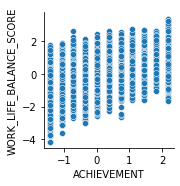

In [11]:
sns.pairplot(data, x_vars=["ACHIEVEMENT"], y_vars=["WORK_LIFE_BALANCE_SCORE"])
plt.show()

### Calculate correlation coefficients

In [36]:
correlations = data.corr()
print(correlations["WORK_LIFE_BALANCE_SCORE"])

FRUITS_VEGGIES             0.452255
DAILY_STRESS              -0.365398
PLACES_VISITED             0.529615
CORE_CIRCLE                0.507541
SUPPORTING_OTHERS          0.548851
SOCIAL_NETWORK             0.412586
ACHIEVEMENT                0.561244
DONATION                   0.458829
BMI_RANGE                 -0.251988
TODO_COMPLETED             0.545503
FLOW                       0.478199
DAILY_STEPS                0.422981
LIVE_VISION                0.471311
SLEEP_HOURS                0.196395
LOST_VACATION             -0.266243
DAILY_SHOUTING            -0.273153
SUFFICIENT_INCOME          0.403561
PERSONAL_AWARDS            0.504224
TIME_FOR_PASSION           0.516967
WEEKLY_MEDITATION          0.416171
GENDER                     0.039881
WORK_LIFE_BALANCE_SCORE    1.000000
AGE_21 to 35              -0.099242
AGE_36 to 50               0.007121
AGE_51 or more             0.126378
AGE_Less than 20          -0.021036
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64


### Feature selection

In [40]:
X = data.drop("WORK_LIFE_BALANCE_SCORE", axis=1)
y = data["WORK_LIFE_BALANCE_SCORE"]

lasso = LassoCV(cv=5)
lasso.fit(X, y)
coef = pd.Series(lasso.coef_, index=X.columns)
print("LASSO picked " + str(sum(coef != 0)) + " variables and eliminated " + str(sum(coef == 0)) + " variables")

LASSO picked 20 variables and eliminated 5 variables


In [44]:
# Create a DataFrame with variable names and their coefficients
lasso_results = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})
print(lasso_results)

              Feature  Coefficient
0      FRUITS_VEGGIES     0.108836
1        DAILY_STRESS    -0.103183
2      PLACES_VISITED     0.125059
3         CORE_CIRCLE     0.107179
4   SUPPORTING_OTHERS     0.122374
5      SOCIAL_NETWORK     0.116261
6         ACHIEVEMENT     0.104052
7            DONATION     0.139582
8           BMI_RANGE    -0.185303
9      TODO_COMPLETED     0.099158
10               FLOW     0.088858
11        DAILY_STEPS     0.121818
12        LIVE_VISION     0.121815
13        SLEEP_HOURS     0.050224
14      LOST_VACATION    -0.139022
15     DAILY_SHOUTING    -0.100732
16  SUFFICIENT_INCOME     0.167580
17    PERSONAL_AWARDS     0.116501
18   TIME_FOR_PASSION     0.103002
19  WEEKLY_MEDITATION     0.113740
20             GENDER     0.000000
21       AGE_21 to 35    -0.000000
22       AGE_36 to 50    -0.000000
23     AGE_51 or more     0.000000
24   AGE_Less than 20     0.000000


In [45]:
# Display the selected variables
selected_variables = lasso_results[lasso_results["Coefficient"] != 0]
print("Selected Variables:")
print(selected_variables)

Selected Variables:
              Feature  Coefficient
0      FRUITS_VEGGIES     0.108836
1        DAILY_STRESS    -0.103183
2      PLACES_VISITED     0.125059
3         CORE_CIRCLE     0.107179
4   SUPPORTING_OTHERS     0.122374
5      SOCIAL_NETWORK     0.116261
6         ACHIEVEMENT     0.104052
7            DONATION     0.139582
8           BMI_RANGE    -0.185303
9      TODO_COMPLETED     0.099158
10               FLOW     0.088858
11        DAILY_STEPS     0.121818
12        LIVE_VISION     0.121815
13        SLEEP_HOURS     0.050224
14      LOST_VACATION    -0.139022
15     DAILY_SHOUTING    -0.100732
16  SUFFICIENT_INCOME     0.167580
17    PERSONAL_AWARDS     0.116501
18   TIME_FOR_PASSION     0.103002
19  WEEKLY_MEDITATION     0.113740


In [46]:
# Display the eliminated variables
eliminated_variables = lasso_results[lasso_results["Coefficient"] == 0]
print("Eliminated Variables:")
print(eliminated_variables)

Eliminated Variables:
             Feature  Coefficient
20            GENDER          0.0
21      AGE_21 to 35         -0.0
22      AGE_36 to 50         -0.0
23    AGE_51 or more          0.0
24  AGE_Less than 20          0.0


### Train Linear Regression Model to predict the Work_Life_Balance_Score based on the selected attributes

In [48]:
# Train-test split
x = data.drop(["WORK_LIFE_BALANCE_SCORE", "GENDER", "AGE_21 to 35", "AGE_36 to 50", "AGE_51 or more", "AGE_Less than 20"], axis=1)
Y = data["WORK_LIFE_BALANCE_SCORE"]
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 2.7527878765015972e-09
MAE: 4.14040733543185e-05
R2: 0.9999999971917558


In [50]:
# Interpret the model
coef = pd.Series(model.coef_, index=x.columns)
print(coef.sort_values(ascending=False))

SUFFICIENT_INCOME    0.167859
DONATION             0.139846
PLACES_VISITED       0.125046
SUPPORTING_OTHERS    0.122432
DAILY_STEPS          0.122013
LIVE_VISION          0.121995
PERSONAL_AWARDS      0.116684
SOCIAL_NETWORK       0.116565
WEEKLY_MEDITATION    0.113892
FRUITS_VEGGIES       0.108957
CORE_CIRCLE          0.107231
ACHIEVEMENT          0.104056
TIME_FOR_PASSION     0.103075
TODO_COMPLETED       0.099084
FLOW                 0.089042
SLEEP_HOURS          0.050601
DAILY_SHOUTING      -0.101070
DAILY_STRESS        -0.103302
LOST_VACATION       -0.139404
BMI_RANGE           -0.185765
dtype: float64
